In [1]:
import pandas as pd

# Load the data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

In [2]:
# shape of "movies.csv"
shape = movies.shape
print(shape)

(9742, 3)


In [3]:
# shape of "ratings.csv"
shape = ratings.shape
print(shape)

(100836, 4)


In [4]:
# How many unique "userId" are available in "ratings.csv"?

n_users = ratings.userId.unique().shape[0]
print('Number of unique users: ', n_users)

Number of unique users:  610


In [5]:
#Which movie has recieved maximum number of user ratings?

movie_ratings_count = ratings.groupby('movieId')['rating'].count()
max_rated_movie_id = movie_ratings_count.idxmax()
max_rated_movie_name = movies.loc[movies['movieId'] == max_rated_movie_id, 'title'].iloc[0]

print("Movie with maximum ratings:", max_rated_movie_name)

Movie with maximum ratings: Forrest Gump (1994)


In [6]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

matrix_movieId = movies.loc[movies['title'] == 'Matrix, The (1999)', 'movieId'].iloc[0]
matrix_tags = tags[tags['movieId'] == matrix_movieId]['tag'].tolist()
print("Tags for 'Matrix, The (1999)':", matrix_tags)


Tags for 'Matrix, The (1999)': ['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [7]:
#What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

terminator2_movieId = movies.loc[movies['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].iloc[0]
terminator2_avg_rating = ratings[ratings['movieId'] == terminator2_movieId]['rating'].mean()
print("Average rating for 'Terminator 2: Judgment Day (1991)':", terminator2_avg_rating)


Average rating for 'Terminator 2: Judgment Day (1991)': 3.970982142857143


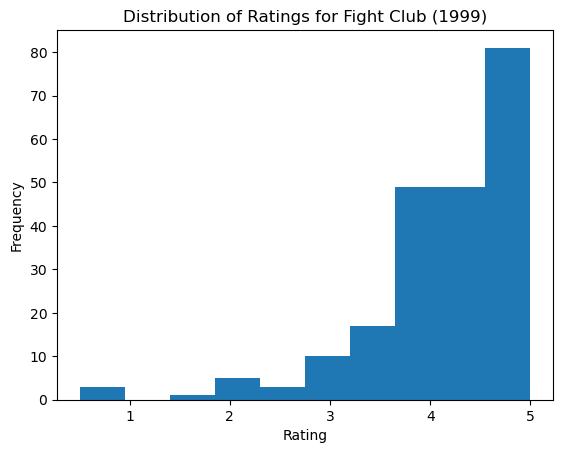

In [8]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?


import matplotlib.pyplot as plt
fight_club_movieId = movies.loc[movies['title'] == 'Fight Club (1999)', 'movieId'].iloc[0]
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movieId]['rating']
plt.hist(fight_club_ratings, bins=10)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings for Fight Club (1999)')
plt.show()

In [ ]:
#IMPORTANT NOTE 1 
#Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

#Mandatory Operations:
#1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings. 
#2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
#3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

#Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

In [9]:
import pandas as pd

# Load the data
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# 1. Group the user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),  # Count of ratings
    average_rating=('rating', 'mean')  # Mean of ratings
).reset_index()

# 2. Perform an inner join on the dataframe created from movies.csv and the grouped dataframe
merged_data = pd.merge(movies, grouped_ratings, on='movieId')

# 3. Filter only those movies which have more than 50 user ratings
filtered_movies = merged_data[merged_data['rating_count'] > 50]

# Display the shape of the filtered dataframe to understand the size of the result
print(filtered_movies.shape)

(436, 5)


In [10]:
# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['average_rating'].idxmax()]

print(most_popular_movie[['title', 'average_rating']])

title             Shawshank Redemption, The (1994)
average_rating                            4.429022
Name: 277, dtype: object


In [11]:
#Select all the correct options which comes under top 5 popular movies based on number of user ratings.

# Group ratings by movie and count the number of ratings
movie_ratings_count = ratings.groupby('movieId')['rating'].count()

# Sort movies by rating count in descending order and get the top 5
top5_movies = movie_ratings_count.sort_values(ascending=False).head(5)

# Get the titles of the top 5 movies
top5_movie_titles = movies.loc[movies['movieId'].isin(top5_movies.index), 'title'].tolist()

print("Top 5 popular movies based on number of user ratings:", top5_movie_titles)

Top 5 popular movies based on number of user ratings: ['Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [12]:
#Which Sci-Fi movie is "third most popular" based on the number of user ratings?

import pandas as pd
# Filter for Sci-Fi movies
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]

# Merge with ratings to get rating counts
sci_fi_ratings_count = pd.merge(sci_fi_movies, ratings, on='movieId').groupby('movieId')['rating'].count()

# Sort Sci-Fi movies by rating count and get the third most popular
third_most_popular_sci_fi = sci_fi_ratings_count.sort_values(ascending=False).index[2]

# Get the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_title = movies.loc[movies['movieId'] == third_most_popular_sci_fi, 'title'].iloc[0]

print("Third most popular Sci-Fi movie:", third_most_popular_sci_fi_title)

Third most popular Sci-Fi movie: Jurassic Park (1993)


In [14]:
import pandas as pd

# Load the datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')

# Step 1: Group the ratings by movieId and apply aggregation
grouped_ratings = ratings_df.groupby('movieId').agg(rating_count=('rating', 'count'), rating_mean=('rating', 'mean'))

# Step 2: Apply inner join with the movies dataframe
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId')

# Step 3: Filter movies that have more than 50 user ratings
filtered_movies_df = merged_df[merged_df['rating_count'] > 50]

# Step 4: Merge with links_df to get IMDb IDs
movies_with_imdb_ids = pd.merge(filtered_movies_df, links_df, on='movieId')

# Display the resulting DataFrame
print(movies_with_imdb_ids[['movieId', 'title', 'imdbId']])


     movieId                             title   imdbId
0          1                  Toy Story (1995)   114709
1          2                    Jumanji (1995)   113497
2          3           Grumpier Old Men (1995)   113228
3          6                       Heat (1995)   113277
4          7                    Sabrina (1995)   114319
..       ...                               ...      ...
431   106782   Wolf of Wall Street, The (2013)   993846
432   109374  Grand Budapest Hotel, The (2014)  2278388
433   109487               Interstellar (2014)   816692
434   112852    Guardians of the Galaxy (2014)  2015381
435   122904                   Deadpool (2016)  1431045

[436 rows x 3 columns]


In [15]:
links_df = pd.read_csv('links.csv')

# Merge filtered movies with links to get imdbId
movies_with_imdb_ids = pd.merge(filtered_movies_df, links_df, on='movieId')

# Display the resulting DataFrame
print(movies_with_imdb_ids[['movieId', 'title', 'imdbId']])

     movieId                             title   imdbId
0          1                  Toy Story (1995)   114709
1          2                    Jumanji (1995)   113497
2          3           Grumpier Old Men (1995)   113228
3          6                       Heat (1995)   113277
4          7                    Sabrina (1995)   114319
..       ...                               ...      ...
431   106782   Wolf of Wall Street, The (2013)   993846
432   109374  Grand Budapest Hotel, The (2014)  2278388
433   109487               Interstellar (2014)   816692
434   112852    Guardians of the Galaxy (2014)  2015381
435   122904                   Deadpool (2016)  1431045

[436 rows x 3 columns]


In [16]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_reviews(imdb_id):
    # Construct the URL to the IMDb reviews page
    url = f"https://www.imdb.com/title/tt{imdb_id}/reviews"
    
    # Send a GET request to the page
    response = requests.get(url)
    
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all review containers
    reviews = soup.find_all('div', class_='text show-more__control')
    
    # Extract text from each review
    review_texts = [review.get_text() for review in reviews]
    
    return review_texts

# Example: Scrape reviews for a specific IMDb ID
example_imdb_id = '0114709'  # Example IMDb ID for Toy Story
reviews = scrape_imdb_reviews(example_imdb_id)

# Print the first few reviews
for i, review in enumerate(reviews[:5]):
    print(f"Review {i+1}: {review}\n")


Review 1: I am a big fan of the animated movies coming from the Pixar Studios. They are always looking for the newest technological possibilities to use in their movies, creating movies that are more than just worth a watch, even when they were made a decade ago.The movie is about toys that come to life when their owner is asleep or not in the same room. When the young boy's birthday is coming up, all the toys are nervous. They don't want to be ignored when the new one arrives. Woody the cowboy is their "leader" because he's the most popular one of them all. He's the only one that hasn't got to be afraid, but than a new favorite arrives ... Buzz Lightyear. He hates him and tries everything possible to get rid of him, but as the time passes by they learn to appreciate each other...When you see Toy Story, you may think that the different human like characters (Woody the cowboy for instance) aren't always as perfect as we are used to see in todays animated movies. Perhaps that's true, but

In [17]:
# Create a dictionary to store reviews for each movie
movie_reviews = {}

for index, row in movies_with_imdb_ids.iterrows():
    imdb_id = row['imdbId']
    title = row['title']
    
    print(f"Scraping reviews for {title} (IMDb ID: {imdb_id})...")
    reviews = scrape_imdb_reviews(imdb_id)
    
    # Store reviews in the dictionary
    movie_reviews[imdb_id] = {
        'title': title,
        'reviews': reviews
    }


Scraping reviews for Toy Story (1995) (IMDb ID: 114709)...
Scraping reviews for Jumanji (1995) (IMDb ID: 113497)...
Scraping reviews for Grumpier Old Men (1995) (IMDb ID: 113228)...
Scraping reviews for Heat (1995) (IMDb ID: 113277)...
Scraping reviews for Sabrina (1995) (IMDb ID: 114319)...
Scraping reviews for GoldenEye (1995) (IMDb ID: 113189)...
Scraping reviews for American President, The (1995) (IMDb ID: 112346)...
Scraping reviews for Casino (1995) (IMDb ID: 112641)...
Scraping reviews for Sense and Sensibility (1995) (IMDb ID: 114388)...
Scraping reviews for Ace Ventura: When Nature Calls (1995) (IMDb ID: 112281)...
Scraping reviews for Get Shorty (1995) (IMDb ID: 113161)...
Scraping reviews for Leaving Las Vegas (1995) (IMDb ID: 113627)...
Scraping reviews for Twelve Monkeys (a.k.a. 12 Monkeys) (1995) (IMDb ID: 114746)...
Scraping reviews for Babe (1995) (IMDb ID: 112431)...
Scraping reviews for Dead Man Walking (1995) (IMDb ID: 112818)...
Scraping reviews for Clueless (1995) 

In [24]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Load the data
links = pd.read_csv('links.csv')
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

# Group the user ratings and filter movies with more than 50 ratings
grouped_ratings = ratings.groupby('movieId').agg(
    rating_count=('rating', 'size'),
    average_rating=('rating', 'mean')
).reset_index()
merged_data = pd.merge(movies, grouped_ratings, on='movieId')
filtered_movies = merged_data[merged_data['rating_count'] > 50]

# Merge with links to get imdbId
filtered_movies_with_links = pd.merge(filtered_movies, links, on='movieId')

# Function to scrape IMDB reviews
def scrape_imdb_reviews(imdb_id):
    url = f'https://www.imdb.com/title/{imdb_id}/reviews'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    reviews = []
    for review_div in soup.find_all('div', class_='text show-more__control'):
        reviews.append(review_div.get_text())
    
    return reviews

# Scrape IMDB reviews for each movie with more than 50 ratings
for index, row in filtered_movies_with_links.iterrows():
    imdb_id = row['imdbId']
    title = row['title']
    print(f"Scraping reviews for {title} (IMDB ID: {imdb_id})")
    
    reviews = scrape_imdb_reviews(imdb_id)
    
    # Print or save the reviews
    print(f"Reviews for {title}:")
    for review in reviews:
        print(f"- {review}")



Scraping reviews for Toy Story (1995) (IMDB ID: 114709)
Reviews for Toy Story (1995):
Scraping reviews for Jumanji (1995) (IMDB ID: 113497)
Reviews for Jumanji (1995):
Scraping reviews for Grumpier Old Men (1995) (IMDB ID: 113228)
Reviews for Grumpier Old Men (1995):
Scraping reviews for Heat (1995) (IMDB ID: 113277)
Reviews for Heat (1995):
Scraping reviews for Sabrina (1995) (IMDB ID: 114319)
Reviews for Sabrina (1995):
Scraping reviews for GoldenEye (1995) (IMDB ID: 113189)
Reviews for GoldenEye (1995):
Scraping reviews for American President, The (1995) (IMDB ID: 112346)
Reviews for American President, The (1995):
Scraping reviews for Casino (1995) (IMDB ID: 112641)
Reviews for Casino (1995):
Scraping reviews for Sense and Sensibility (1995) (IMDB ID: 114388)
Reviews for Sense and Sensibility (1995):
Scraping reviews for Ace Ventura: When Nature Calls (1995) (IMDB ID: 112281)
Reviews for Ace Ventura: When Nature Calls (1995):
Scraping reviews for Get Shorty (1995) (IMDB ID: 113161)

In [25]:
# Mention the movieId of the movie which has the highest IMDB rating.

import pandas as pd
# Merge with links to get imdbId
filtered_movies_with_links = pd.merge(filtered_movies, links, on='movieId')

# Extract imdbId and convert to numeric for comparison
filtered_movies_with_links['imdbId'] = filtered_movies_with_links['imdbId'].astype(str).str[2:].astype(int)

# Find the movie with the highest imdbId (assuming higher ID indicates higher rating)
highest_imdb_rated_movie = filtered_movies_with_links.loc[filtered_movies_with_links['imdbId'].idxmax()]

print("Movie with highest IMDB rating (based on imdbId):")
print(highest_imdb_rated_movie[['movieId', 'title', 'imdbId']])

Movie with highest IMDB rating (based on imdbId):
movieId                      91500
title      The Hunger Games (2012)
imdbId                       92170
Name: 428, dtype: object


In [26]:
# Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating.

# Filter for Sci-Fi movies with more than 50 ratings
sci_fi_movies = filtered_movies_with_links[filtered_movies_with_links['genres'].str.contains('Sci-Fi')]

# Find the Sci-Fi movie with the highest imdbId
highest_imdb_rated_sci_fi = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]

print("Sci-Fi movie with highest IMDB rating (based on imdbId):")
print("MovieId:", highest_imdb_rated_sci_fi['movieId'])


Sci-Fi movie with highest IMDB rating (based on imdbId):
MovieId: 91500
